In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_excel('C:\\Users\\Kane.Merrill\\Documents\\HallOfFameAnalysis\\InitialData.xlsx',sheetname='ForPython')

In [3]:
init_data = data.drop(["Year Inducted","Name","Position","Way inducted"\
                       ,"Real Percent"],axis=1)

In [15]:
year_col = []
for i in range(1900,1990):
    year_col.append(i)

In [20]:
grouped_data = pd.pivot_table(init_data,values=year_col,columns=["Sport"],aggfunc=np.sum)

In [17]:
grouped_data["Total"] = grouped_data.sum(axis=1)

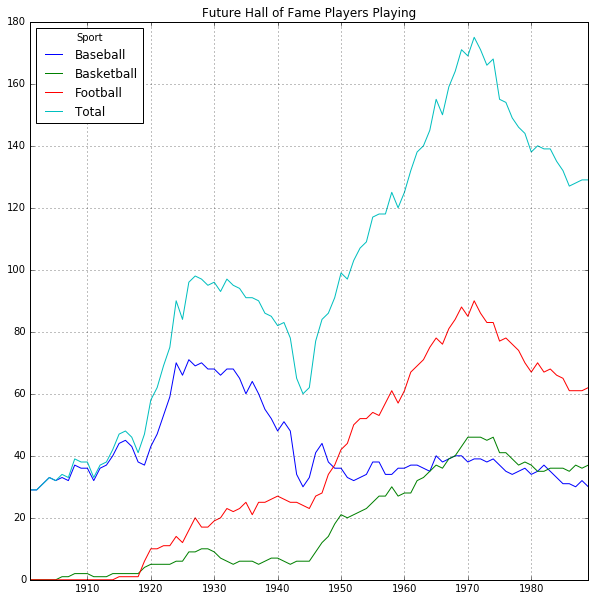

In [19]:
grouped_data[1:130].plot(figsize=(10,10),\
    title="Future Hall of Fame Players Playing",grid=True)

In [21]:
baseball_data = data[data["Sport"] == "Baseball"]

In [22]:
baseball_data

,Name,Sport,Year Inducted,Position,Way inducted,Real Percent,1871,1872,1873,1874,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,Total
1,Addie Joss,Baseball,1978,P,VC,0.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
5,Al Kaline,Baseball,1980,RF,BBWAA,0.8831,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22
6,Al Simmons,Baseball,1953,LF,BBWAA,0.7538,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20
14,Amos Rusie,Baseball,1977,P,VC,0.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
15,Andre Dawson,Baseball,2010,OF,BBWAA,0.7790,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20
18,Andy Cooper,Baseball,2006,P,SCNL,0.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22
22,Arky Vaughan,Baseball,1985,SS,VC,0.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
31,Babe Ruth,Baseball,1936,RF,BBWAA,0.9513,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22
33,Barry Larkin,Baseball,2012,SS,BBWAA,0.8640,0,0,0,0,...,1,1,0,0,0,0,0,0,0,19
36,Ben Taylor,Baseball,2006,1B,SCNL,0.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22


In [25]:
baseball_data["Position"].value_counts()/baseball_data["Position"].count()

P     0.313008
SS    0.097561
RF    0.093496
CF    0.093496
1B    0.089431
LF    0.085366
2B    0.081301
C     0.069106
3B    0.065041
OF    0.008130
DH    0.004065
Name: Position, dtype: float64

In [26]:
def pitcher_or_not(x):
    if x == "P":
        return "Pitcher"
    else:
        return "Fielder"

In [27]:
baseball_data["binary_position"] = baseball_data["Position"].map(pitcher_or_not)

C:\Users\Kane.Merrill\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [28]:
baseball_data["binary_position"].value_counts()/baseball_data["binary_position"].count()

Fielder    0.686992
Pitcher    0.313008
Name: binary_position, dtype: float64

In [53]:
players_data = pd.read_excel("C:\\Users\\Kane.Merrill\\Documents\\HallOfFameAnalysis\\allplayersdata.xlsx",sheetname="ForPython"\
                            ,parse_dates=[2])

In [54]:
players_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19953 entries, 0 to 19952
Data columns (total 3 columns):
LAST,FIRST    19953 non-null object
ID            19953 non-null object
DEBUT         19953 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 623.5+ KB


In [55]:
players_data["year"] = players_data["DEBUT"].apply(lambda x: x.year)

In [60]:
players_data["year"].value_counts()

1884    398
1995    300
2015    262
2014    254
2008    249
1979    248
2011    247
1914    246
2013    242
2006    232
1999    231
2007    225
1912    224
1991    223
1998    222
2010    219
2000    218
2012    217
2004    217
2005    216
2002    213
1890    212
1993    212
1996    211
2009    208
2001    206
1913    205
1978    200
1969    197
1911    192
       ... 
1949     93
1932     93
1959     92
1956     92
1887     91
1872     90
1898     89
1883     86
1888     86
1886     86
1899     85
1891     83
1889     77
1918     77
1933     73
1894     69
1896     67
1879     66
1897     62
1892     61
1893     61
1885     59
1876     56
1873     48
1880     44
1874     43
1877     32
1878     25
1881     24
1900     22
Name: year, dtype: int64